# Exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
#1
from sklearn.datasets import make_regression
X, y, coef = make_regression(n_samples = 1000, n_features = 100, coef=True,
                         random_state=42, bias=6)


#perform Ridge regression
#plot y as ridge coefficients and coefficient error and x as alpha
#interpret what is happening
#coefficients can be obtained simply using model.coef_
#coeffcient error can be computed using mean_squared_error(model.coef_, w)

In [3]:
#2
from sklearn.model_selection import train_test_split
X, y, coef = make_regression(n_samples = 1000, n_features = 100, coef=True,
                         random_state=42, bias=6)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#implement Linear regression from scratch using 
#- the closed form OLS
#- the gradient descent
#- (optional challenge) the closed form OLS using pseudo inverse
#measure which one is faster, try to vary the n_features
#so what do you think, closed_form or gradient descent?

In [4]:
#3
#implement Ridge regression from scratch using the closed form OLS
#loop through several alphas and print the errors
#use the same X y from #2

In [5]:
#4
#implement stochastic gradient descent with ridge regression

In [6]:
#5
#implement learning curves from scratch and apply it with the model
#you have created for #3 and #4 using the data from #2 

# Solution

'\nFor big alpha, coefficients are moving to zero, forcing the model\nto be a simpler version.  \n\nFor the right graph, interestingly, increasing the alpha way too much\nresult in errors, once pass 10e-01.  Thus alpha should always be\ntune carefully via GridsearchCV or cross validation\n\n'

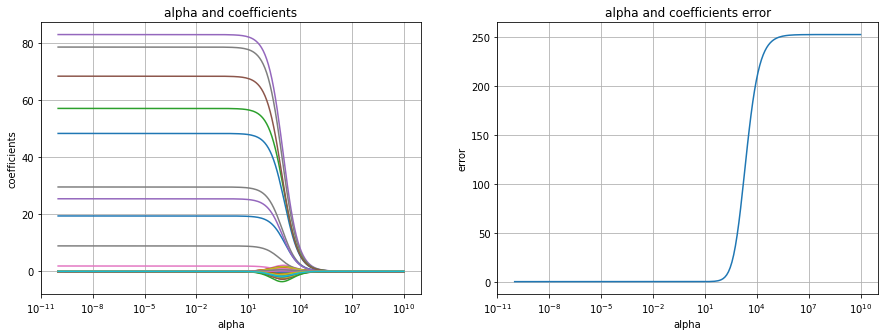

In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

coefs = []
coefs_errors = []

alphas = np.logspace(-10, 10, 200)

#loop through
for a in alphas:
    model = Ridge(alpha = a)
    model.fit(X, y)
    coefs.append(model.coef_)
    coefs_errors.append(mean_squared_error(model.coef_, coef))

# Display results
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].grid()
ax[0].plot(alphas, coefs)
ax[0].set_xscale('log')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('coefficients')
ax[0].set_title('alpha and coefficients')

ax[1].grid()
ax[1].plot(alphas, coefs_errors)
ax[1].set_xscale('log')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('error')
ax[1].set_title('alpha and coefficients error')

'''
For big alpha, coefficients are moving to zero, forcing the model
to be a simpler version.  

For the right graph, interestingly, increasing the alpha way too much
result in errors, once pass 10e-01.  Thus alpha should always be
tune carefully via GridsearchCV or cross validation

'''

In [8]:
#2
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv
from time import time

def linear_regression_ols(X, y, num_feature, pseudo=False):
    X = X[:, :num_feature]
    #append 1 to the left side of matrix X
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    #traditional OLS
    #remember that OLS has the assumption of full-column rank
    #which means the number of samples should be greater than number of features
    w = inv(X.T.dot(X)).dot(X.T).dot(y)
    #another even more efficient way using pseudo-inverse
    if(pseudo):
        w = np.dot(np.linalg.pinv(X), y)
    return w
    
def linear_regression_gradient(X, y, num_feature, max_iter=10, tol=0.1):
    newX = X[:, :num_feature]
    w = np.zeros(num_feature + 1) #b0, b1, ...b_num_features
    m = len(y)
    l_rate = 0.01 #actually need something better, but its ok for now
    #good question is how many iteration
    #perhaps you can set a variable called tol
    #and if the mse falls in some range, its ok
    for i in range(max_iter):
        pred = get_preds(newX, w)
        if (mean_squared_error(y, pred) < tol):
            break
        error = pred - y
        #error.T dot with error is basically sum of squares
        #since error is multiply with error
        sum_of_squared_errors = np.dot(error.T, error)
        #see cost function of partial derivatives
        loss = 1/(2*m) * sum_of_squared_errors
        #update w by minus its partial derivates
        w[0:] = w[0:] - ((l_rate * 1/m) * error.sum())
        w[1:] = w[1:] - ((l_rate * 1/m) * np.dot(newX.T, error))
    return w, i
def get_preds(X, w):
    #squeeze into (n_samples, ) shape so to compare with actual y
    preds = np.squeeze(np.dot(X, w[1:, np.newaxis]) + w[0])
    return preds

test_num_feature = np.linspace(1, X.shape[1], 5, dtype=int)
print("===Gradient Descent===")
for num_feature in test_num_feature: 
    start = time()
    w, i = linear_regression_gradient(X_train, y_train, num_feature=num_feature, max_iter=2000)
    pred = get_preds(X_test[:, :num_feature], w)
    print(f"Results finish using {i+1} iteration and {num_feature} features with MSE of " +
    f"{mean_squared_error(y_test, pred)}" + 
        f" using time of {time() - start}")

print("===OLS===")
for num_feature in test_num_feature: 
    start = time()
    w = linear_regression_ols(X_train, y_train, num_feature=num_feature)
    pred = get_preds(X_test[:, :num_feature], w)
    print(f"Results finish with MSE of " +
    f"{mean_squared_error(y_test, pred)}" + 
        f" using time of {time() - start}")
    
print("===OLS using pseudo-inverse==")
#I found pseudo-inverse to work much better than ols when full-rank assumption is violated
for num_feature in test_num_feature: 
    start = time()
    w = linear_regression_ols(X_train, y_train, num_feature=num_feature, pseudo=True)
    pred = get_preds(X_test[:, :num_feature], w)
    print(f"Results finish using {num_feature} features with MSE of " +
    f"{mean_squared_error(y_test, pred)}" + 
        f" using time of {time() - start}")

===Gradient Descent===
Results finish using 2000 iteration and 1 features with MSE of 20473.12330309125 using time of 0.7242879867553711
Results finish using 2000 iteration and 25 features with MSE of 8998.594741371953 using time of 1.244476079940796
Results finish using 2000 iteration and 50 features with MSE of 6496.661875162632 using time of 1.2516908645629883
Results finish using 2000 iteration and 75 features with MSE of 4981.178955575713 using time of 1.2989203929901123
Results finish using 1100 iteration and 100 features with MSE of 0.22052395425740812 using time of 0.5912470817565918
===OLS===
Results finish with MSE of 20473.123302096225 using time of 0.0019550323486328125
Results finish with MSE of 8998.592918776585 using time of 0.00186920166015625
Results finish with MSE of 6496.653248117297 using time of 0.002053976058959961
Results finish with MSE of 4981.1795128663025 using time of 0.003103971481323242
Results finish with MSE of 8.669465648779487e-27 using time of 0.0037

Text(0, 0.5, 'mse')

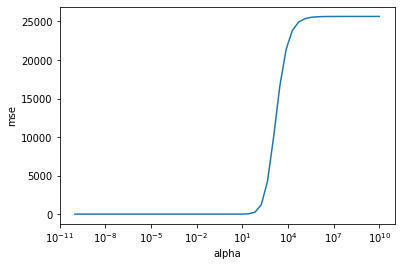

In [9]:
#3
import numpy as np
def ridge(X, y, alpha):
    #append 1 to the left side of matrix X
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    
    # Get identity matrix
    I = np.eye(X.shape[1])
    
    # Set up equations (X^T dot X + lambda * I) dot w = X^T dot y        
    # Solve for w
    # use @ for dot, for easier readability...if you like
    w = np.linalg.solve((X.T @ X) + alpha * I, X.T @ y)
    return w

alphas = np.logspace(-10, 10, 50)
errors = []
alphas_plot = []

for alpha in alphas: 
    w = ridge(X_train, y_train, alpha=alpha)
    pred = get_preds(X_test, w)
    errors.append(mean_squared_error(y_test, pred))
    alphas_plot.append(alpha)
    
plt.plot(alphas_plot, errors)
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel("mse")